# Import Libraries

In [513]:
import pandas as pd
import re
import string

import seaborn as sns
import matplotlib.pyplot as plt

# Data Wrangling

## Gathering Data

In [525]:
# Load the dataset using pandas

df = pd.read_csv('../data/Dataset_Number2&3a.csv', sep=',')
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0,NaN,5-10,69,1009,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1,NaN,5-10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0,school_bus,5-10,76,78,75


In [72]:
row, col = df.shape
print(f"The dataset has {row} rows and {col} columns")

The dataset has 30641 rows and 15 columns


*Data Description :*
1. Gender: Gender of the student (male/female)
2. EthnicGroup: Ethnic group of the student (group A to E)
3. ParentEduc: Parent(s) education background (from some_highschool to master's degree) 
4. LunchType: School lunch type (standard or free/reduced) 
5. TestPrep: Test preparation course followed (completed or none) 
6. ParentMaritalStatus: Parent(s) marital status (married/single/widowed/divorced)
7. PracticeSport: How often the student practice sport (never/sometimes/regularly)
8. IsFirstChild: If the child is the first child in the family or not (yes/no)
9. NrSiblings: Number of siblings the student has (0 to 7)
10. TransportMeans: Means of transport to school (schoolbus/private)
11. WklyStudyHours: Weekly self-study hours (less than 5hrs; between 5 and 10hrs; more than 10hrs)
12. MathScore: math test score(0-100)
13. ReadingScore: reading test score(0-100)
14. WritingScore: writing test score(0-100)

*Insight :*
- The dataset has 30641 rows and 15 columns.
- The data remains unprocessed and does not yet align with the described specifications.

## Assessing Data

In [73]:
# The information about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           30641 non-null  object
 1   Gender               30639 non-null  object
 2   EthnicGroup          28799 non-null  object
 3   ParentEduc           28794 non-null  object
 4   LunchType            30639 non-null  object
 5   TestPrep             28809 non-null  object
 6   ParentMaritalStatus  29449 non-null  object
 7   PracticeSport        30008 non-null  object
 8   IsFirstChild         29735 non-null  object
 9   NrSiblings           29068 non-null  object
 10  TransportMeans       27505 non-null  object
 11  WklyStudyHours       29684 non-null  object
 12  MathScore            30639 non-null  object
 13  ReadingScore         30639 non-null  object
 14  WritingScore         30639 non-null  object
dtypes: object(15)
memory usage: 3.5+ MB


In [69]:
# Checking null values
print(df.isnull().sum())

Gender                    2
EthnicGroup            1842
ParentEduc             1847
LunchType                 2
TestPrep               1832
ParentMaritalStatus    1192
PracticeSport           633
IsFirstChild            906
NrSiblings             1573
TransportMeans         3136
WklyStudyHours          957
MathScore                 2
ReadingScore              2
WritingScore              2
dtype: int64


In [62]:
print(df.nunique())

Gender                  24
EthnicGroup             24
ParentEduc              21
LunchType               28
TestPrep                18
ParentMaritalStatus     29
PracticeSport           43
IsFirstChild            27
NrSiblings              34
TransportMeans          16
WklyStudyHours           8
MathScore              110
ReadingScore           108
WritingScore           105
dtype: int64


In [63]:
print("Unique value for Gender column")
df['Gender'].unique()

Unique value for Gender column


array(['female', 'male', 'femalemale', 'femaleeee', '0', '1',
       'malefemalemale', 'male?', 'female#', 'male*', 'fefemale^',
       'male)(', 'female**', 'male^@^', 'femmale >', 'femamale<>',
       'non-binary', 'male<><>', 'malemlae', 'lema', 'females', 'males',
       'femalele', '-', nan], dtype=object)

*Insight*
- The data still contains missing values and some inconsistencies in formatting, requiring further cleaning.
- The data type (dtype) for all columns is still set to object, which requires adjustments, such as converting to integer for numerical data.
- The data is still inconsistent, for example, the Gender column, which should have only 2 unique values (male/female), instead contains 24 unique values.

## Cleaning Data

In [531]:
# Drop 'Unnamed: 0' column

df.drop('Unnamed: 0', axis=1, inplace=True)

In [532]:
## Copy Dataframe and drop null values from all columns

df1 = df.copy()

df1 = df.dropna(axis=0)


In [533]:
# Function to clean and validate group data
def clean_group(value):
    # Normalize value to lowercase and remove extra spaces
    value = value.strip().lower()
    # Regex to match valid format (group A-F)
    match = re.match(r'^group [a-e]$', value)
    if match:
        return string.capwords(value)  # Return in "Group X" format
    else:
        return None  # Invalid value

# Function to clean weakly hours data
def clean_weakly_hours(value):
    # Normalize: remove extra spaces
    value = value.strip()
    
    # Regex for categories
    if re.match(r'^<\s*5$', value):  # Match "< 5"
        return '< 5'
    elif re.match(r'^5\s*-\s*10$', value):  # Match "5-10"
        return '5-10'
    elif re.match(r'^>\s*10$', value):  # Match "> 10"
        return '> 10'
    else:
        return None  # Invalid value

In [556]:
# Apply cleaning function to 'EthnicGroup' and 'WklyStudyHours' columns
df1.loc[:, 'EthnicGroup'] = df1['EthnicGroup'].apply(clean_group)
df1.loc[:, 'WklyStudyHours'] = df1['WklyStudyHours'].apply(clean_weakly_hours)

# Filter rows based on valid values for several categorical columns
df1 = df1[df1['Gender'].str.lower().isin(['female', 'male'])]  # Gender should be 'female' or 'male'
df1 = df1[df1['ParentEduc'].str.lower().isin(["master's degree", "bachelor's degree", "associate's degree", "some college", "high school", "some high school"])]  # Valid parent education levels
df1 = df1[df1['LunchType'].str.lower().isin(['standard', 'free/reduced'])]  # Lunch type should be 'standard' or 'free/reduced'
df1 = df1[df1['TestPrep'].str.lower().isin(['completed', 'none'])]  # Test preparation status
df1 = df1[df1['ParentMaritalStatus'].str.lower().isin(['married','single','widowed','divorced'])]  # Parent marital status
df1 = df1[df1['PracticeSport'].str.lower().isin(['never','sometimes','regularly'])]  # Frequency of practicing sports
df1 = df1[df1['IsFirstChild'].str.lower().isin(['yes','no'])]  # Whether it's the first child
df1 = df1[df1['TransportMeans'].str.lower().isin(['school_bus','private'])]  # Transportation means

# Convert columns to numeric and filter invalid values
df1['NrSiblings'] = pd.to_numeric(df1['NrSiblings'], downcast="integer", errors='coerce')  # Convert to integer, non-convertible values become NaN
df1 = df1[df1['NrSiblings'].between(0, 7)]  # Keep only valid sibling numbers (0-7)

# Convert score columns to numeric, filtering invalid values (NaN or out of range)
df1['MathScore'] = pd.to_numeric(df1['MathScore'], errors='coerce')
df1 = df1[df1['MathScore'].between(0, 100)]  # Math score should be between 0 and 100
df1['ReadingScore'] = pd.to_numeric(df1['ReadingScore'], errors='coerce')
df1 = df1[df1['ReadingScore'].between(0, 100)]  # Reading score should be between 0 and 100
df1['WritingScore'] = pd.to_numeric(df1['WritingScore'], errors='coerce')
df1 = df1[df1['WritingScore'].between(0, 100)]  # Writing score should be between 0 and 100

# Drop rows with any NaN values
df1 = df1.dropna()

# Display summary info of the cleaned DataFrame
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19049 entries, 2 to 30639
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               19049 non-null  object 
 1   EthnicGroup          19049 non-null  object 
 2   ParentEduc           19049 non-null  object 
 3   LunchType            19049 non-null  object 
 4   TestPrep             19049 non-null  object 
 5   ParentMaritalStatus  19049 non-null  object 
 6   PracticeSport        19049 non-null  object 
 7   IsFirstChild         19049 non-null  object 
 8   NrSiblings           19049 non-null  int8   
 9   TransportMeans       19049 non-null  object 
 10  WklyStudyHours       19049 non-null  object 
 11  MathScore            19049 non-null  float64
 12  ReadingScore         19049 non-null  float64
 13  WritingScore         19049 non-null  float64
dtypes: float64(3), int8(1), object(10)
memory usage: 2.6+ MB


In [557]:
# Display the count of unique values in each column of the DataFrame
print(df1.nunique())

# Display the unique values in the 'Gender' column
df1['Gender'].unique()

Gender                  2
EthnicGroup             5
ParentEduc              6
LunchType               2
TestPrep                2
ParentMaritalStatus     4
PracticeSport           3
IsFirstChild            2
NrSiblings              8
TransportMeans          2
WklyStudyHours          3
MathScore              95
ReadingScore           91
WritingScore           91
dtype: int64


array(['female', 'male'], dtype=object)

In [558]:
# Save the DataFrame to an Excel file without including the index column
df1.to_excel('../data/Dataset_Number2&3a.xlsx', index=False)

*Insight :*
- After the data cleaning process, the dataset consists of 19,049 rows and 14 columns.
- The 'NrSiblings', 'MathScore', 'ReadingScore', and 'WritingScore' columns have been converted to a numeric data type.

# Exploratory Data Analysis (EDA)

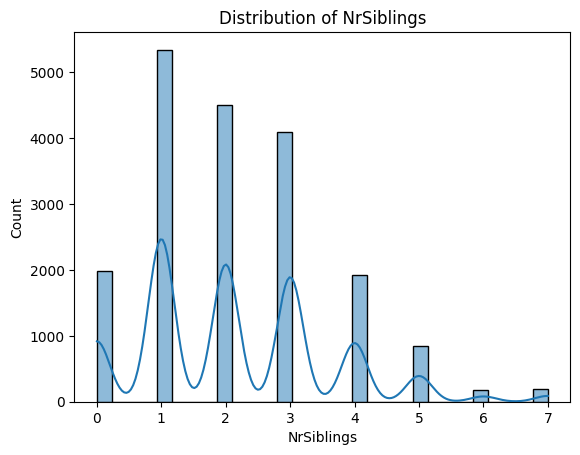

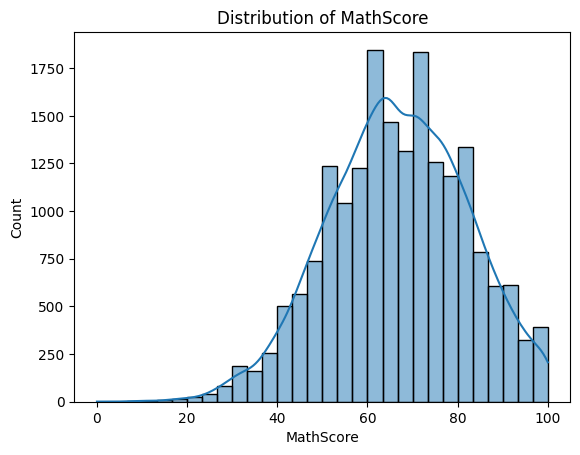

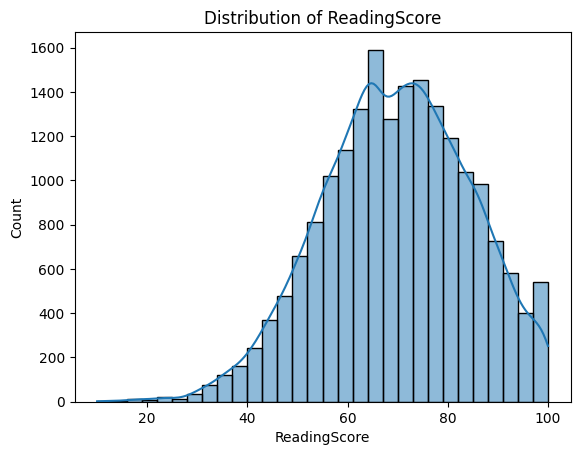

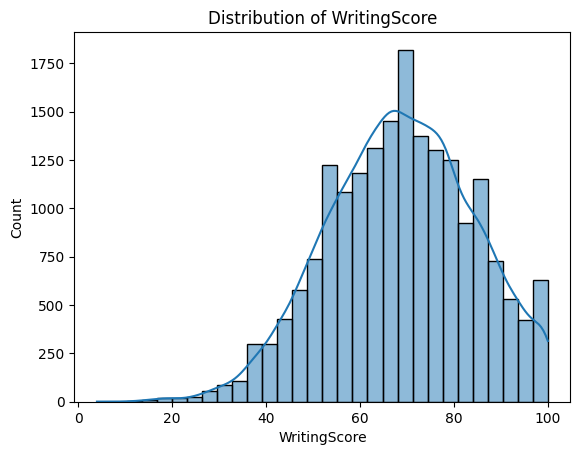

In [537]:
# Visualize the distribution of numeric columns with histograms
numerical_cols = ['NrSiblings', 'MathScore', 'ReadingScore', 'WritingScore']

for col in numerical_cols:
    sns.histplot(df1[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

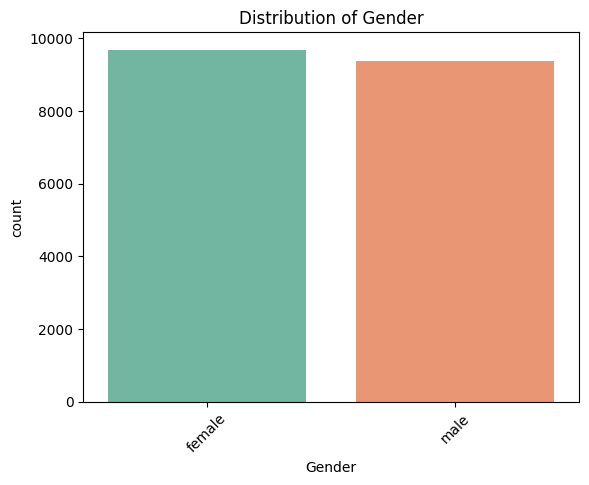

        MathScore        ReadingScore        WritingScore       
             mean median         mean median         mean median
Gender                                                          
female  64.272107   64.0    73.088533   73.0    73.088946   73.0
male    69.111004   69.0    65.904935   66.0    64.013982   64.0


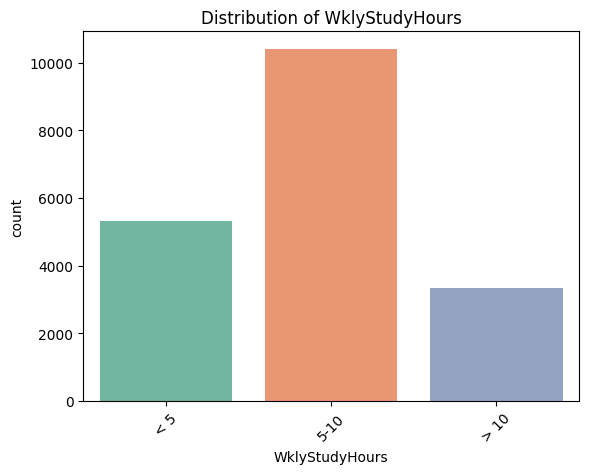

                MathScore        ReadingScore        WritingScore       
                     mean median         mean median         mean median
WklyStudyHours                                                          
5-10            66.969429   67.0    69.785554   70.0    68.805230   69.0
< 5             64.630201   65.0    68.473545   69.0    67.402372   68.0
> 10            68.881295   70.0    70.559952   71.0    70.012590   70.0


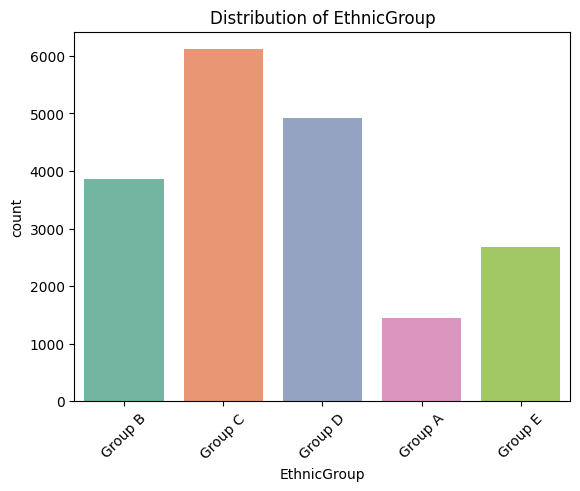

             MathScore        ReadingScore        WritingScore       
                  mean median         mean median         mean median
EthnicGroup                                                          
Group A      63.080745   63.0    66.706004   66.0    65.076605   65.0
Group B      63.517571   64.0    67.324634   68.0    65.958398   66.0
Group C      64.717718   65.0    68.622262   69.0    67.223276   68.0
Group D      67.842030   68.0    70.635533   71.0    71.177056   71.0
Group E      75.315594   76.0    74.449572   75.0    72.896911   74.0


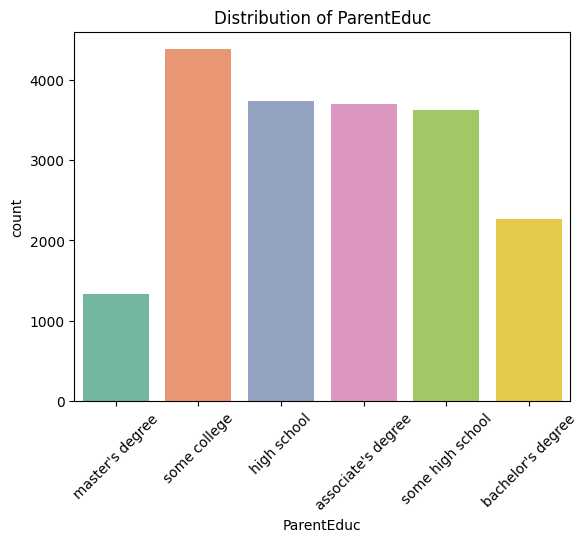

                    MathScore        ReadingScore        WritingScore       
                         mean median         mean median         mean median
ParentEduc                                                                  
associate's degree  68.557386   69.0    71.338104   72.0    70.579260   71.0
bachelor's degree   70.744391   71.0    73.563572   74.0    73.876815   74.0
high school         64.282498   64.0    67.284464   68.0    65.503082   66.0
master's degree     72.399850   73.0    76.028507   77.0    76.522881   77.0
some college        66.586396   66.0    69.330062   70.0    68.681580   69.0
some high school    62.547685   63.0    65.453693   65.0    63.583241   64.0


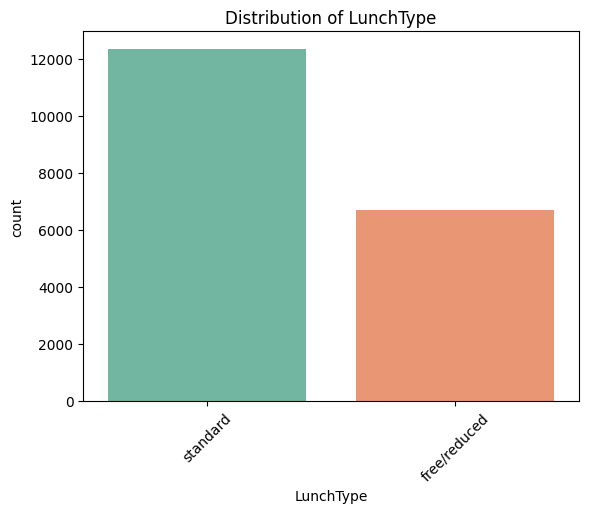

              MathScore        ReadingScore        WritingScore       
                   mean median         mean median         mean median
LunchType                                                             
free/reduced  58.898762   59.0    64.295959   64.0    62.777546   63.0
standard      70.865419   71.0    72.413493   73.0    71.803516   72.0


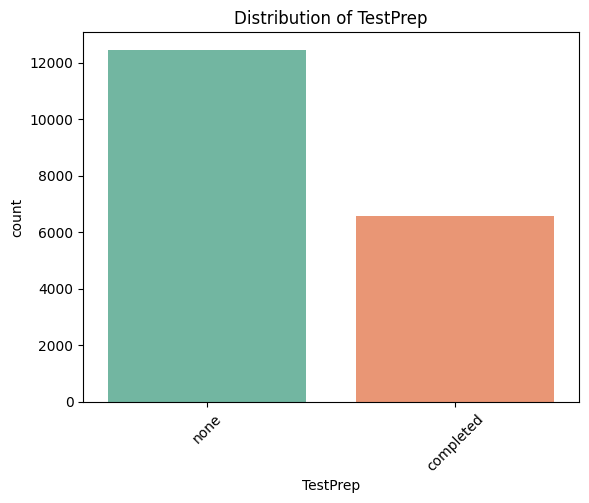

           MathScore        ReadingScore        WritingScore       
                mean median         mean median         mean median
TestPrep                                                           
completed  69.659584   70.0    73.873476   74.0    74.875398   75.0
none       65.061637   65.0    67.271910   67.0    65.320546   66.0


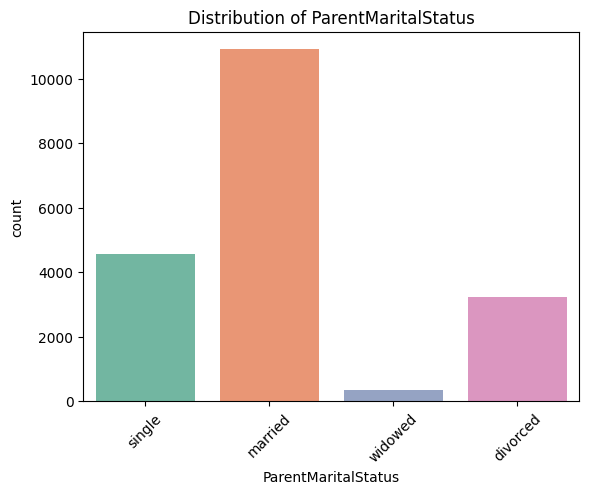

                     MathScore        ReadingScore        WritingScore       
                          mean median         mean median         mean median
ParentMaritalStatus                                                          
divorced             66.771995   67.0    69.872057   70.0    69.015489   69.0
married              66.698404   67.0    69.477925   70.0    68.489085   69.0
single               66.337654   67.0    69.428822   70.0    68.593146   69.0
widowed              68.119891   69.0    70.640327   71.0    69.651226   70.0


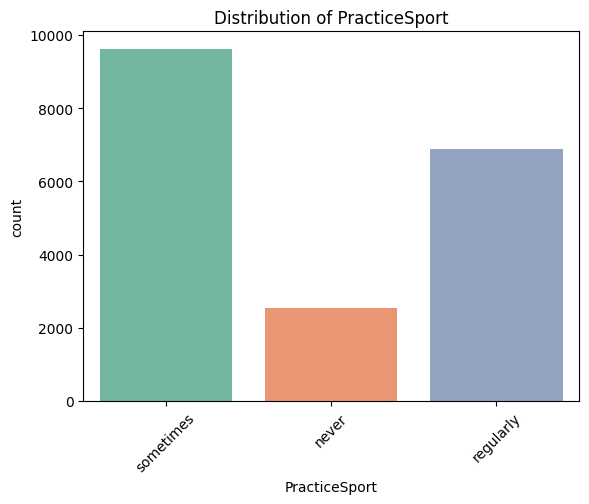

               MathScore        ReadingScore        WritingScore       
                    mean median         mean median         mean median
PracticeSport                                                          
never          64.578597   65.0    68.773422   69.0    67.031360   68.0
regularly      67.638820   67.0    69.953703   70.0    69.637077   70.0
sometimes      66.495788   67.0    69.477691   70.0    68.324389   69.0


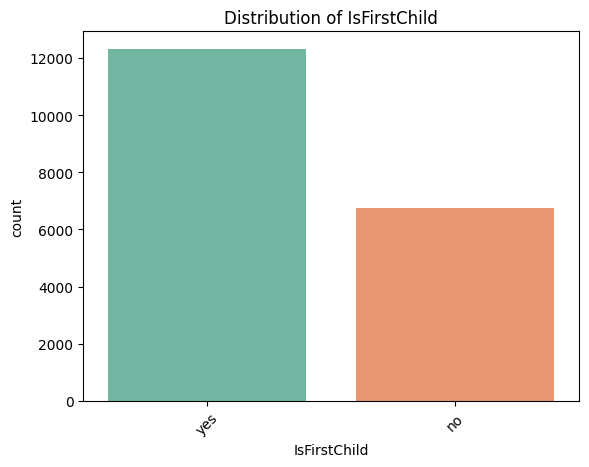

              MathScore        ReadingScore        WritingScore       
                   mean median         mean median         mean median
IsFirstChild                                                          
no            66.484268   67.0    69.439498   70.0    68.596913   69.0
yes           66.743888   67.0    69.618796   70.0    68.641215   69.0


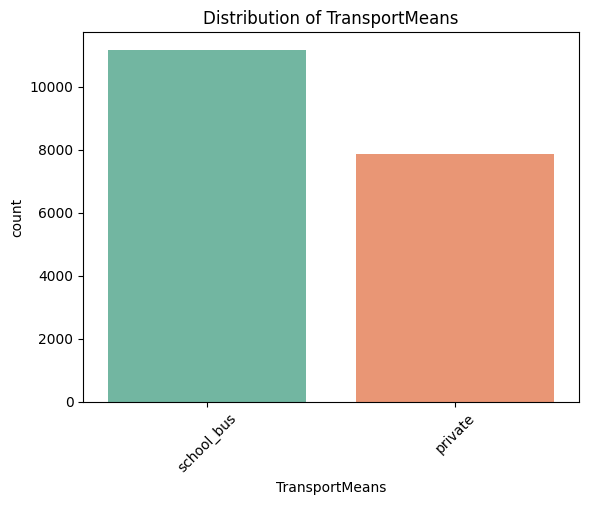

                MathScore        ReadingScore        WritingScore       
                     mean median         mean median         mean median
TransportMeans                                                          
private         66.533765   67.0    69.547982   70.0    68.619447   69.0
school_bus      66.735476   67.0    69.560589   70.0    68.629845   69.0


In [555]:
# Visualize the distribution of categorical features with count plots
categorical_cols = ['Gender','WklyStudyHours', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
                    'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'TransportMeans']

for col in categorical_cols:
    sns.countplot(data=df1, x=col, palette='Set2', hue=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()
    print(df1.groupby([col])[['MathScore', 'ReadingScore', 'WritingScore']].agg(['mean','median']))

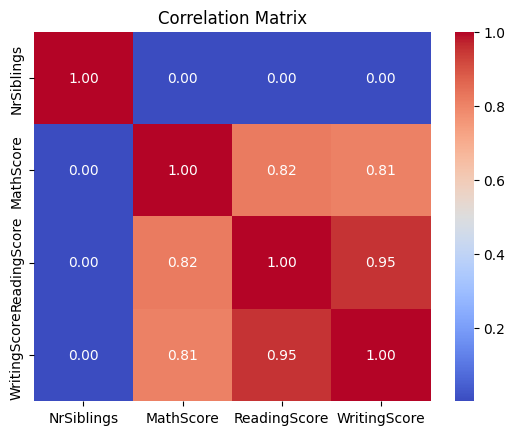

In [544]:
# Compute the correlation matrix for numeric features
correlation_matrix = df1[numerical_cols].corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

*Insight :*
- Imbalanced distribution in the categorical column, such as EthnicGroup.
- High correlation between MathScore, ReadingScore, and WritingScore.